In [1]:
8#importing required libraries
import os  # for input output
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from collections import Counter
    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint



In [2]:
#setting the working directory

os.chdir("C:/Users/dell/PYTHON DATA SCIENCE WORK")
print(os.getcwd())

C:\Users\dell\PYTHON DATA SCIENCE WORK


In [3]:
#loading the data
train=pd.read_csv("train_cab.csv",na_values = {"pickup_datetime":"43"})
test =pd.read_csv("test_cab.csv")

In [4]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


# Understanding the dataset

In [5]:
test.head() # fare_amt is not here

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [6]:
train.shape

(16067, 7)

In [7]:
train.dtypes  # OBJ TO NUMERIC ALWAYS

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [8]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [10]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Hyper parameter turing to check the parameter on which are model run fast
# Random search cv
# Grid search cv
# Haversine formula

# Data Pre Processing
# 1)data exploration and missing value analysis

In [11]:
#converting fare amt from obj to numeric
train['fare_amount'] = pd.to_numeric(train['fare_amount'],errors='coerce') # this error will convert all the non numeric value to nan

In [12]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [13]:
train.shape

(16067, 7)

In [14]:
train.dropna(subset = ["pickup_datetime"])  # Dropping Na values in datetime col

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


# FOR TRAIN SET

In [15]:
#pickup date_time is in obj we need to change its data type to datetime
train["pickup_datetime"] = pd.to_datetime(train["pickup_datetime"],format='%Y-%m-%d %H:%M:%S UTC')

In [16]:
#seprate the pickup_datetime to seprate fields like year ,month and day
train['year']= train['pickup_datetime'].dt.year
train['Month']=train['pickup_datetime'].dt.month
train['Date']=train['pickup_datetime'].dt.day
train['Day']=train['pickup_datetime'].dt.dayofweek
train['Hour']=train['pickup_datetime'].dt.hour
train['Minute']=train['pickup_datetime'].dt.minute


In [17]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

# FOR TEST SET

In [18]:
#pickup date_time is in obj we need to change its data type to datetime
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format='%Y-%m-%d %H:%M:%S UTC')

In [19]:
#seprate the pickup_datetime to seprate fields like year ,month and day
test['year']= test['pickup_datetime'].dt.year
test['Month']=test['pickup_datetime'].dt.month
test['Date']=test['pickup_datetime'].dt.day
test['Day']=test['pickup_datetime'].dt.dayofweek
test['Hour']=test['pickup_datetime'].dt.hour
test['Minute']=test['pickup_datetime'].dt.minute

In [20]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

# Missing value analysis

In [21]:
# removing datetime missing value row
train = train.drop(train[train['pickup_datetime'].isnull()].index,axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [22]:
train['passenger_count'].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [23]:
#max number of passenger_count is 5345 which is actually not possible,so reducing passenger count to 6
train = train.drop(train[train['passenger_count']>6].index,axis=0)


In [24]:
# also removing the value with passenger count =0
train = train.drop(train[train['passenger_count']==0].index,axis=0)


In [25]:
train['passenger_count'].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [26]:
train['passenger_count'].sort_values(ascending=True)

8862     0.12
0        1.00
9790     1.00
9791     1.00
9792     1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

In [27]:
#Removing passenger count missiong value row
train = train.drop(train[train['passenger_count'].isnull()].index,axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15934, 13)
0


In [28]:
# THERE IS ONE PASSENGER COUNT OF 0.12 WHICH IS NOT POSSIBLE,HENCE REMOVE FRACTIONAL VALUE
train = train.drop(train[train['passenger_count']==0.12].index,axis=0)
train.shape


(15933, 13)

In [29]:
# Finding descending order of fare to get to know hwter outlier present or not
train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [30]:
#count the number of values in which fair amt is less then 0
Counter(train['fare_amount']<0)

Counter({False: 15930, True: 3})

In [31]:
# remove the negative value in fare amt col
train = train.drop(train[train['fare_amount']<0].index,axis=0)
train.shape

(15930, 13)

In [32]:
train['fare_amount'].min()

0.0

In [33]:
# REMOVE THE ROW WHERE FAIR AMT IS 0
train = train.drop(train[train['fare_amount']<1].index,axis=0)
train.shape

(15928, 13)

In [34]:
# There is a huge difference bw 1,2,3 pos in descending order of fair amt so we will remove the rows having fair amt 
train = train.drop(train[train['fare_amount']>454].index,axis=0)
train.shape

(15926, 13)

In [35]:
train['fare_amount'].min()

1.14

In [36]:
#Removing fair amt missiong value row
train = train.drop(train[train['fare_amount'].isnull()].index,axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(15902, 13)
0


In [37]:
train["fare_amount"].sort_values(ascending=False)

607      453.00
980      434.00
1335     180.00
1483     165.00
6630     128.83
          ...  
8596       2.50
7918       2.50
8603       2.50
15490      2.50
1427       1.14
Name: fare_amount, Length: 15902, dtype: float64

In [38]:
train["fare_amount"].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

# Latitude can be from -90to90

# longitude can be from -180to180

In [39]:
train[train['pickup_latitude']<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [40]:
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [41]:
# Removing the out of range value for latitude
train = train.drop(train[train['pickup_latitude']<-90].index,axis=0)
train = train.drop(train[train['pickup_latitude']>90].index,axis=0)
train.shape

(15901, 13)

In [42]:
# Now checking the lngitude values
train[train['pickup_longitude']<-180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [43]:
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [44]:
# Removing the out of range value for latitude
train = train.drop(train[train['pickup_longitude']<-180].index,axis=0)
train = train.drop(train[train['pickup_longitude']>180].index,axis=0)
train.shape

(15901, 13)

In [45]:
# Now checking for dropof longitude and latitude
train[train['dropoff_latitude']<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [46]:
train[train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [47]:
train[train['dropoff_longitude']<-180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [48]:
train[train['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [49]:
train.shape

(15901, 13)

In [50]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [51]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

# CALCULATE DISTANCE BASED ON GIVEN ODINATES

In [52]:
# IN THIS DATA SET WE HAVE BEEN GIVEN PICKUP LATTITUDES AND LONGITUDES AND DROP OFF LONGITUDE AND LATTITUDE
# WE NEED TO CALCUATE THE DISTANCE USING HAVERSINE FORMULA AND WE WILL CREATE A NEW VARIABLE CALLED DISTANCE
from math import radians ,cos , sin ,asin ,sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    
    "calculating the great circle distance bw two points on earth"
    
    #convert decimal degree to radian
    lon1,lat1,lon2,lat2 = map(radians , [lon1,lat1,lon2,lat2])
    #haversin formula
    dlon=lon2-lon1
    dlat=lat2-lat1
    a= sin(dlat/2)**2 + cos(lat1)*cos(lat2)* sin(dlon/2)**2
    c= 2*asin(sqrt(a))
    #radius of earth in km is 6371
    km = 6371 * c
    return km

In [53]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_longitude']].apply(haversine,axis=1)

In [54]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,12738.816488
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,12753.009931
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,12759.897170
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,12756.805717
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,12756.800516


In [55]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_longitude']].apply(haversine,axis=1)

In [56]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,12738.816488
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,12753.009931
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,12759.897170
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,12756.805717
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,12756.800516


In [57]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,12759.088052
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,12756.089577
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,12757.495568
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,12760.535766
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,12762.769210


In [58]:
train.nunique()

fare_amount            459
pickup_datetime      15856
pickup_longitude     13672
pickup_latitude      14110
dropoff_longitude    13763
dropoff_latitude     14136
passenger_count          7
year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15598
dtype: int64

In [59]:
#finding descending order of distance to know if outlier is present or not?
train['distance'].sort_values(ascending = False)

5663     12828.399427
1684     12827.905177
3075     12825.460594
4487     12823.573851
9808     12822.976606
             ...     
4893         0.000000
13045        0.000000
4888         0.000000
13037        0.000000
8589         0.000000
Name: distance, Length: 15901, dtype: float64

In [60]:
train['distance'].describe()

count    15901.000000
mean     12511.008009
std       1740.499857
min          0.000000
25%      12755.463046
50%      12757.576489
75%      12759.348049
max      12828.399427
Name: distance, dtype: float64

In [61]:
train['distance'].max()

12828.399427271343

In [62]:
train['distance'].min()

0.0

In [143]:
# Get value counts for distance
distance_counts = train['distance'].value_counts()

# Display the top distances
print(distance_counts.head(10))  # Show the top 10 distances


9.451969    5
9.453869    2
9.452488    1
9.453445    1
9.454086    1
9.453707    1
9.453771    1
9.452935    1
9.453908    1
9.454187    1
Name: distance, dtype: int64


In [63]:
train['distance'].value_counts()

0.000000        299
12732.211730      5
12756.434211      2
12738.816488      1
12759.011709      1
               ... 
12757.313545      1
12758.541715      1
12758.917878      1
12761.917681      1
12759.387576      1
Name: distance, Length: 15598, dtype: int64

THE TOP 23 DISTANCE VALUES IN THE DISTANCE VARIABLES ARE VERY HIGH , IT MEANS MORE THEN 8000 KMS DISTANCE THEY HAVE TRAVALLED
AFTER THIS IT GOES DOWN TO 127 THERE ARE OUTLIER

In [64]:
train[train['distance']>8000]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,12738.816488
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,12753.009931
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,12759.897170
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,12756.805717
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,12756.800516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16061,10.9,2009-05-20 18:56:42,-73.994191,40.751138,-73.962769,40.769719,1.0,2009.0,5.0,20.0,2.0,18.0,56.0,12755.604695
16062,6.5,2014-12-12 07:41:00,-74.008820,40.718757,-73.998865,40.719987,1.0,2014.0,12.0,12.0,4.0,7.0,41.0,12756.017585
16063,16.1,2009-07-13 07:58:00,-73.981310,40.781695,-74.014392,40.715527,2.0,2009.0,7.0,13.0,0.0,7.0,58.0,12764.742717
16064,8.5,2009-11-11 11:19:07,-73.972507,40.753417,-73.979577,40.765495,1.0,2009.0,11.0,11.0,2.0,11.0,19.0,12757.726863


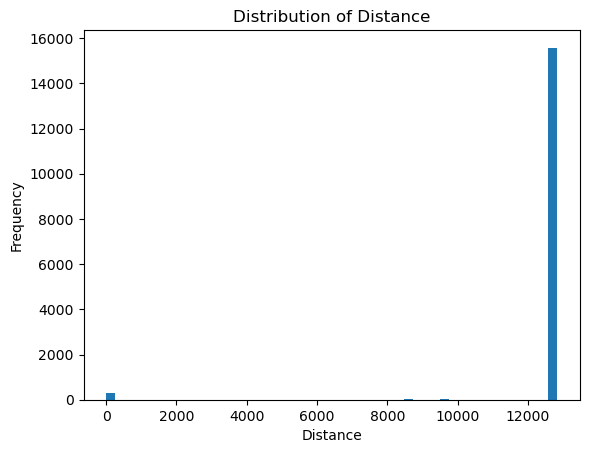

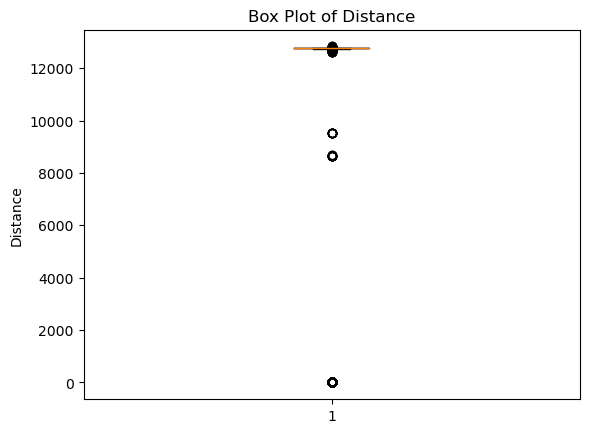

In [65]:
import matplotlib.pyplot as plt

# Plot a histogram
plt.hist(train['distance'], bins=50)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance')
plt.show()

# Plot a box plot
plt.boxplot(train['distance'])
plt.ylabel('Distance')
plt.title('Box Plot of Distance')
plt.show()


In [66]:
mean_distance = train['distance'].mean()
median_distance = train['distance'].median()
std_distance = train['distance'].std()

print(f"Mean Distance: {mean_distance}")
print(f"Median Distance: {median_distance}")
print(f"Standard Deviation: {std_distance}")


Mean Distance: 12511.008008917988
Median Distance: 12757.576489403145
Standard Deviation: 1740.499856837532


In [67]:
threshold = mean_distance + 3 * std_distance


In [68]:
threshold

17732.507579430585

In [69]:
# we will remove the row distance value which is more then 129
train = train.drop(train[train['distance']>17732.50].index,axis=0)
train.shape

(15901, 14)

In [70]:
#Counter(train['distance']==0)

In [71]:
#Counter(test['distance']==0)

In [72]:
#Counter(train['fare_amount']==0)

In [73]:
# we will remove the row distance value which is 0
train = train.drop(train[train['distance']==0].index,axis=0)
train.shape

(15602, 14)

In [74]:
test = test.drop(test[test['distance']==0].index,axis=0)
test.shape

(9914, 13)

In [75]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,12738.816488
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,12753.009931
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,12759.897170
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,12756.805717
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,12756.800516


 WE HAVE SPLITTED THE PICKUP_DATE TIME INTO YEAR,MONTH,DAY,HOUR,MINUTE SO WE ARE DROPPING PICKUP_DATE , dropping long and lat

In [76]:
drop_columns = ['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','Minute']
train = train.drop(drop_columns,axis=1)

In [77]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,12738.816488
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,12753.009931
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,12759.897170
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,12756.805717
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,12756.800516


In [78]:
train.dtypes

fare_amount        float64
passenger_count    float64
year               float64
Month              float64
Date               float64
Day                float64
Hour               float64
distance           float64
dtype: object

In [79]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
distance                    float64
dtype: object

In [80]:
drop_columns = ['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','Minute']
test = test.drop(drop_columns,axis=1)

In [81]:
test.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

# Converting variables to Float Data Type to Int Data Type

In [82]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [83]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [84]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1,2009,6,15,0,17,12738.816488
1,16.9,1,2010,1,5,1,16,12753.009931
2,5.7,2,2011,8,18,3,0,12759.897170
3,7.7,1,2012,4,21,5,4,12756.805717
4,5.3,1,2010,3,9,1,7,12756.800516


# Data Visualization
number of passanger effect the fair
pickup date and time effect the fair
day of the week does affect the fair
distance effect the fair

<Axes: xlabel='passenger_count', ylabel='count'>

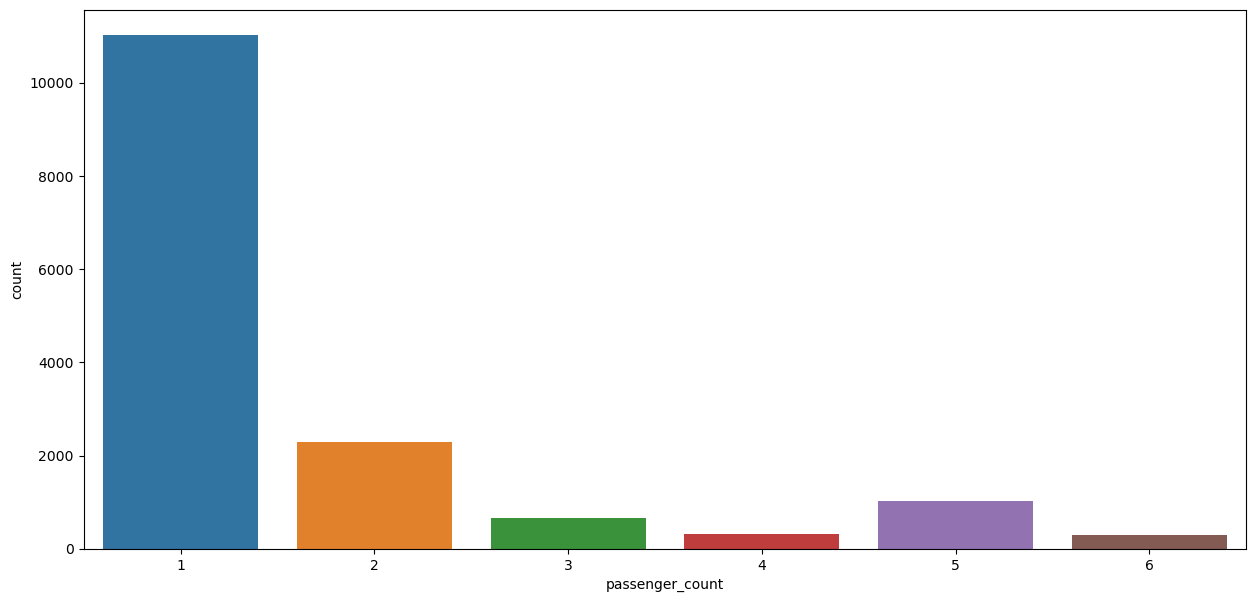

In [85]:
#count plot
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count",data=train)

single and double passanger are frequent riders

Text(0, 0.5, 'Fare')

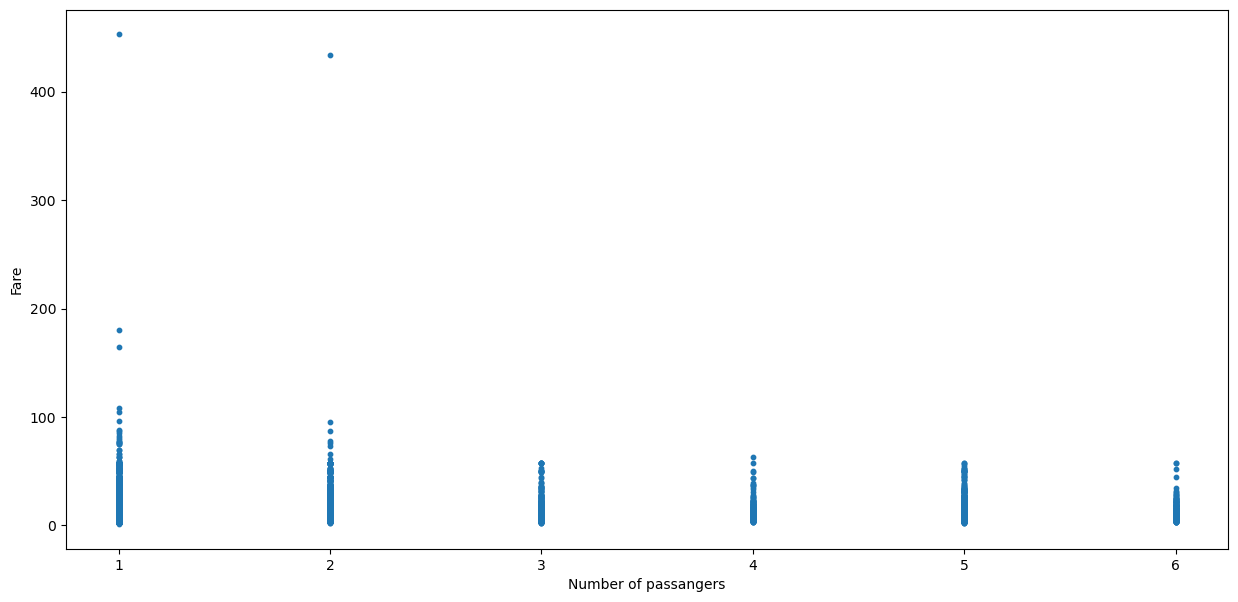

In [86]:
# Relationship bw number f passager and fair
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'],y=train['fare_amount'],s=10)
plt.xlabel("Number of passangers")
plt.ylabel("Fare")

single and double passenger had the maximum fair

Text(0, 0.5, 'Fare')

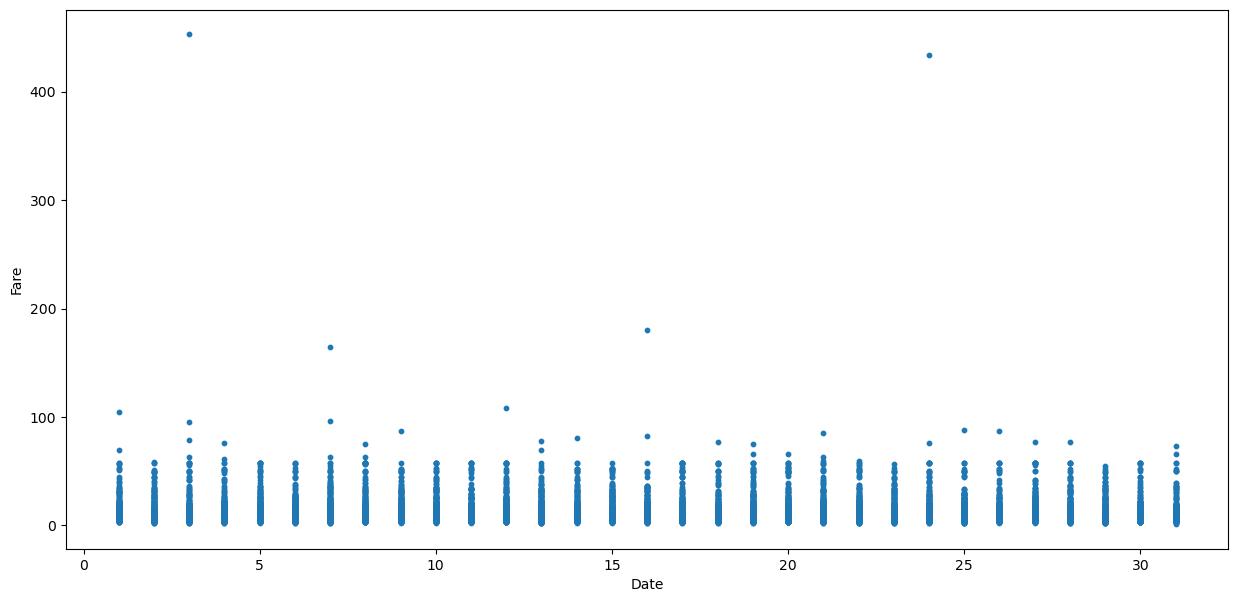

In [87]:
# relationship bw date and fair
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'],y=train['fare_amount'],s=10)
plt.xlabel("Date")
plt.ylabel("Fare")

fair is almost equal in all days

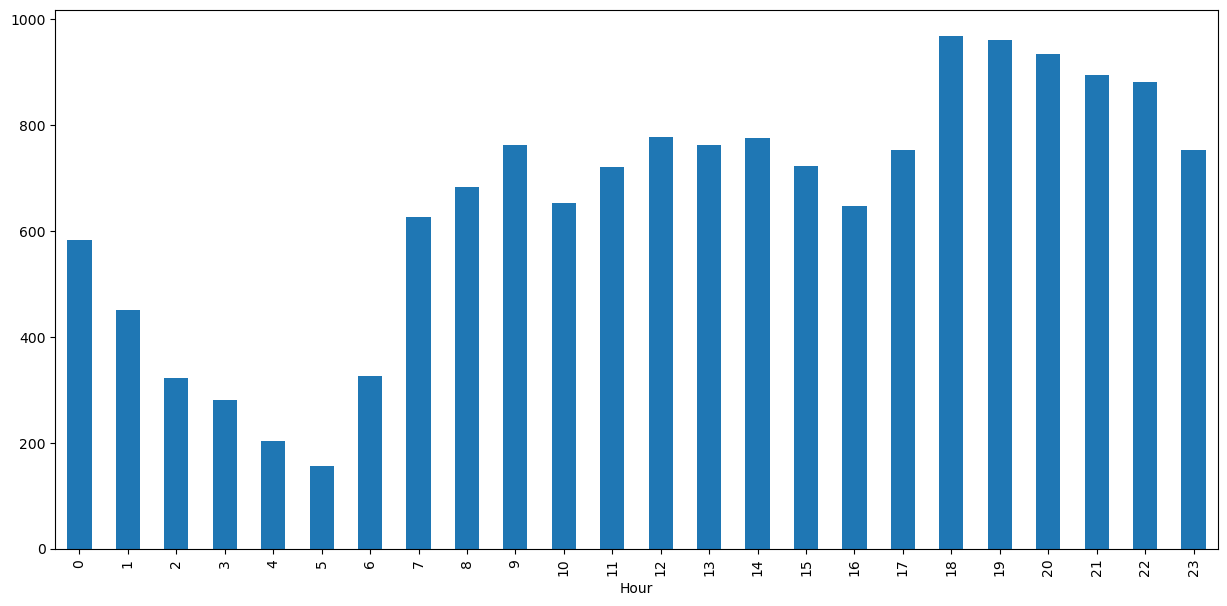

In [88]:
# relationshio bw the hour of day and fair
plt.figure(figsize=(15,7))
train.groupby(train['Hour'])['Hour'].count().plot(kind='bar')
plt.show()

lowest number of cabs were around 5am and highest number of cabs were around bw 6pm to 7 pm

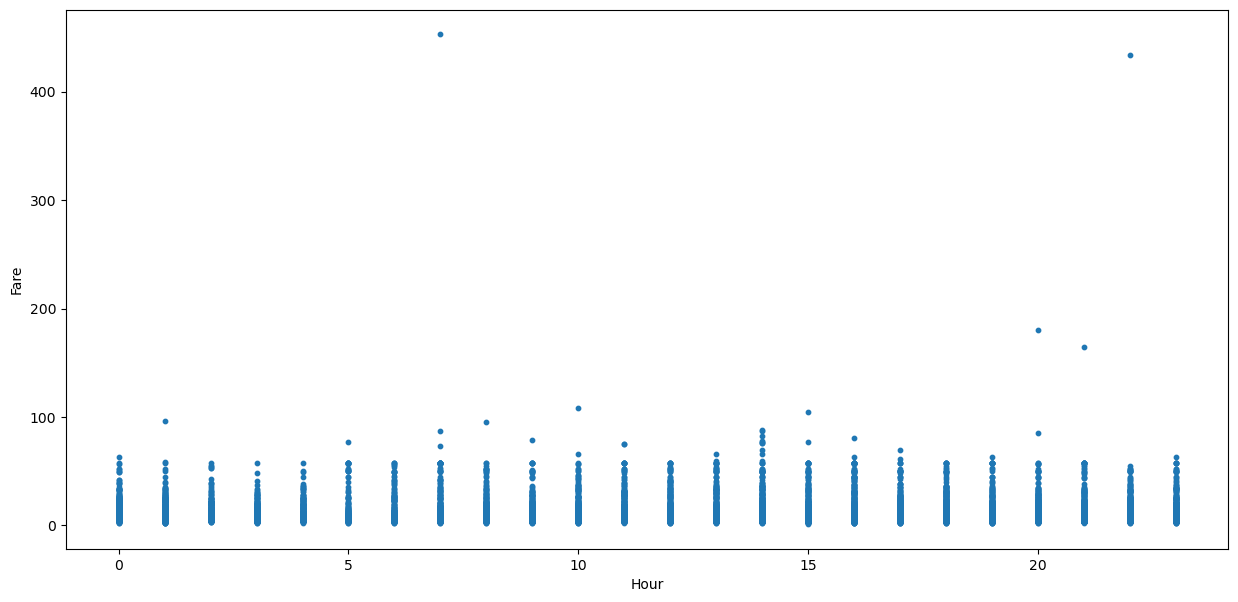

In [89]:
# relationship bw time and fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'],y=train['fare_amount'],s=10)
plt.xlabel("Hour")
plt.ylabel("Fare")
plt.show()

Fare is highest at 7am and around 11 pm which tells the fair is highest in early  morning and late nights

<Axes: xlabel='Day', ylabel='count'>

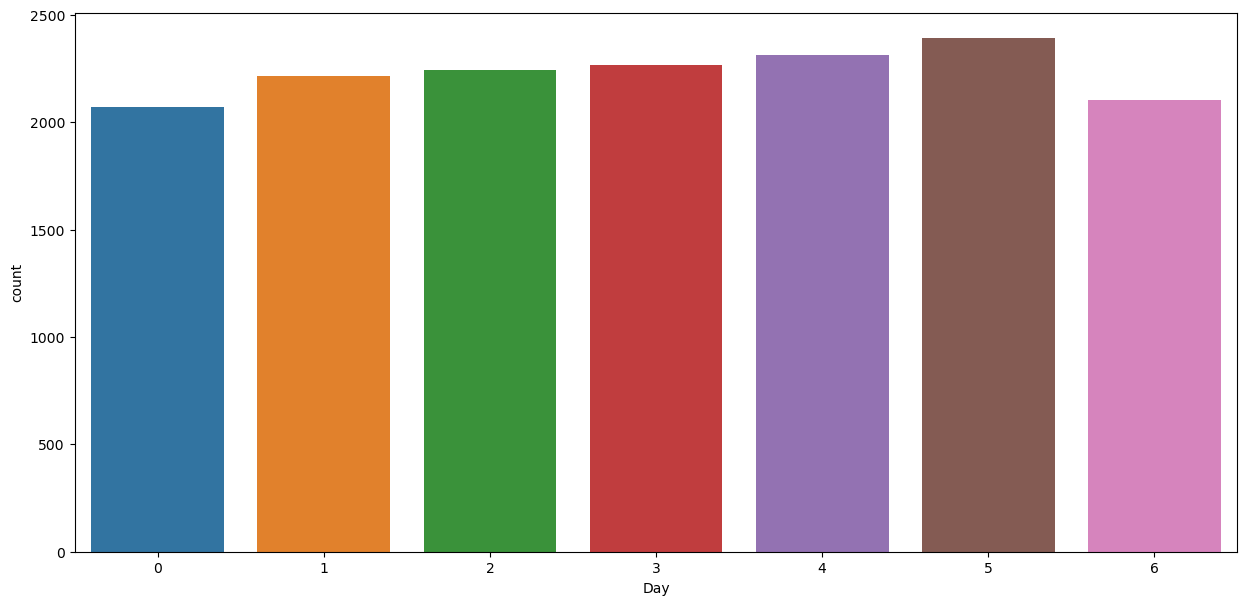

In [90]:
# relationship bw day of the week  and number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x='Day',data= train)

Not much relation bw day of the week and the count of number of cars

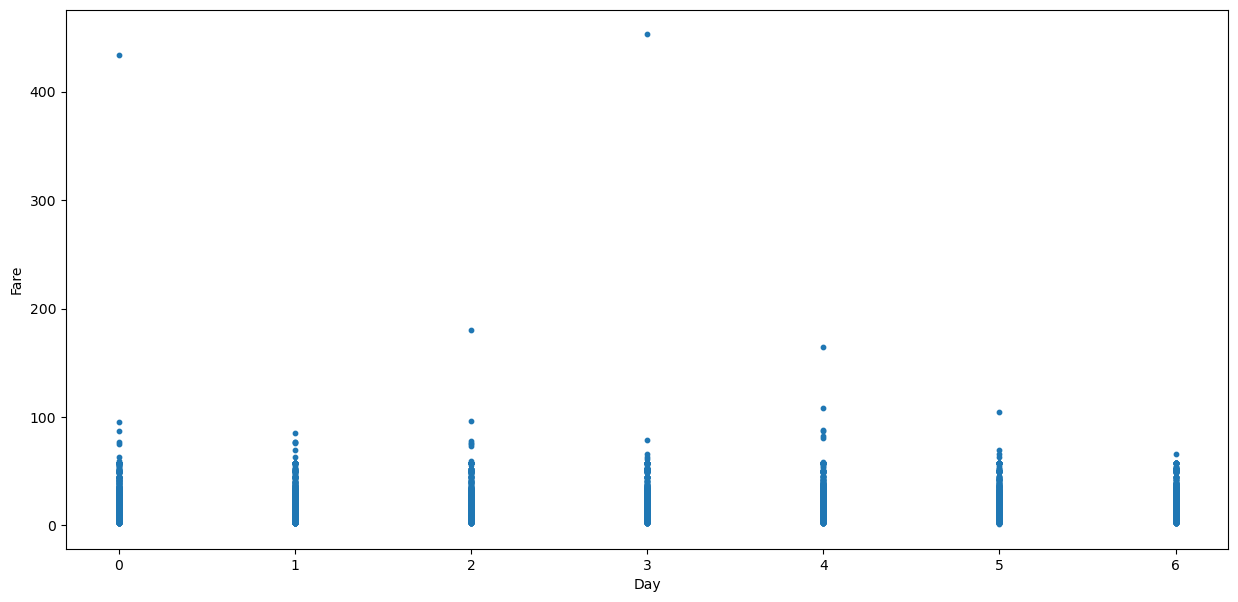

In [91]:
# relationship bw Day and fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day'],y=train['fare_amount'],s=10)
plt.xlabel("Day")
plt.ylabel("Fare")
plt.show()

the highest fare seems to be on sunday,monday and thursday and  low on wednesday and thursday , may be due to low demand on cabs on saturday the cab fare is too low and high demand of cabs on sunday and monday show the high fare price.......

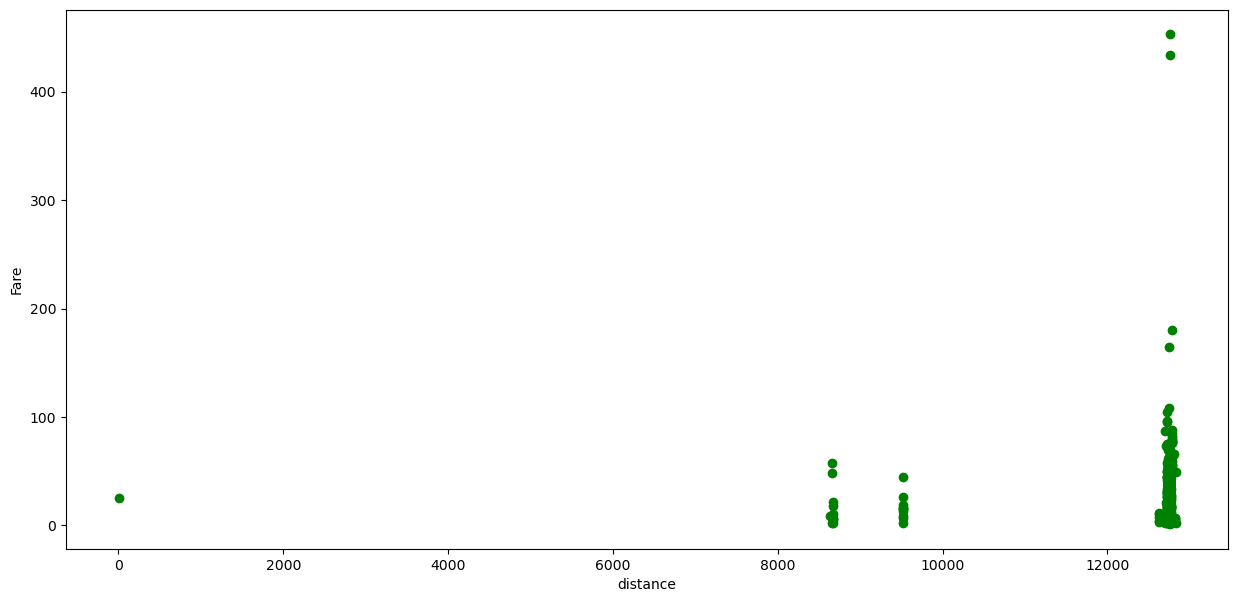

In [92]:
# relationship bw distance and fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['distance'],y=train['fare_amount'],c='g')
plt.xlabel("distance")
plt.ylabel("Fare")
plt.show()

distance is direcly propotional to fare charge as the distance is increasing fare charge also increasing

# Feacture Scaling

fare_amount


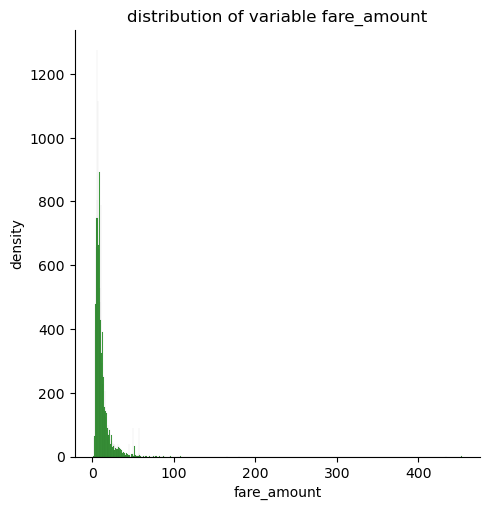

distance


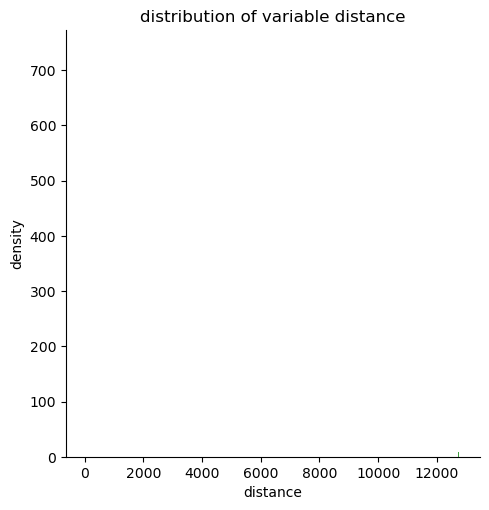

In [93]:
# check the traning data which is uniformally distributed or not
for i in ['fare_amount','distance']:
    print(i)
    sns.displot(train[i],bins='auto',color='green')
    plt.title("distribution of variable "+i)
    plt.ylabel('density')
    plt.show()
    
    
# right skewed

# log transformation

In [94]:
# since the fair amt is hihlt skewed applying log transformation
train['fare_amount'] = np.log1p(train['fare_amount'])

# since variable distance is highly skewed
train['distance'] = np.log1p(train['distance'])

fare_amount


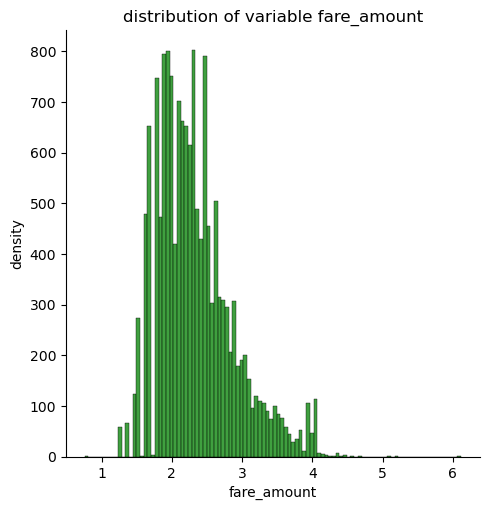

distance


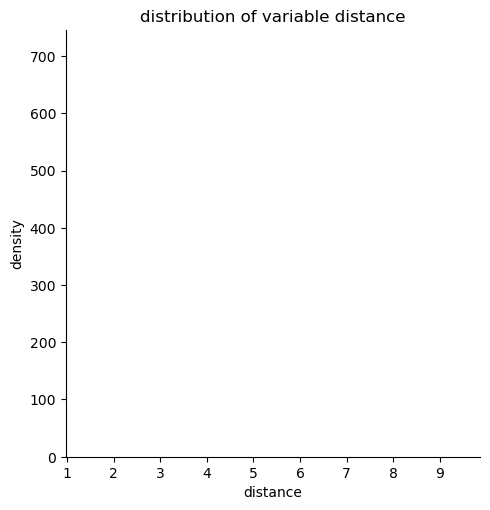

In [95]:
for i in ['fare_amount','distance']:
    print(i)
    sns.displot(train[i],bins='auto',color='green')
    plt.title("distribution of variable "+i)
    plt.ylabel('density')
    plt.show()

distance


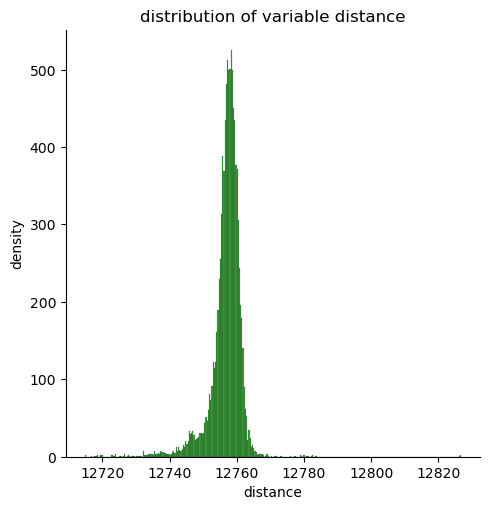

In [96]:
# check the test data which is uniformally distributed or not
for i in ['distance']:
    print(i)
    sns.displot(test[i],bins='auto',color='green')
    plt.title("distribution of variable "+i)
    plt.ylabel('density')
    plt.show()
    

In [97]:
# since variable distance is highly skewed
test['distance'] = np.log1p(test['distance'])

distance


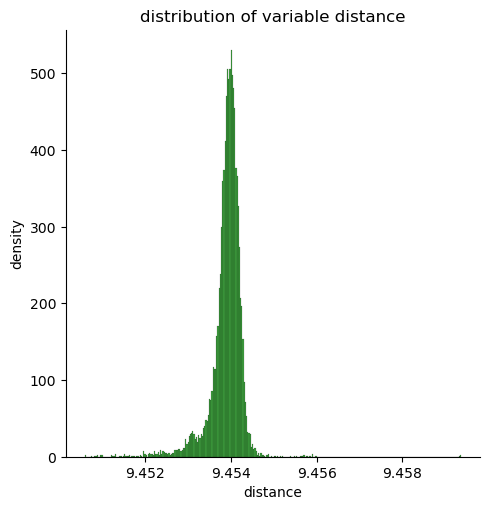

In [98]:
# check the test data which is uniformally distributed or not
for i in ['distance']:
    print(i)
    sns.displot(test[i],bins='auto',color='green')
    plt.title("distribution of variable "+i)
    plt.ylabel('density')
    plt.show()
    

# Applying ML  Algo

1 data modelling
2 decision tree
3 random forest
4 gradient boosting
5 Hyper parameter turing

In [99]:
# train test spilt for further modelling                                          train                 
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,train.columns !='fare_amount'],train.iloc[:,0],test_size=.20,random_state=1)

In [100]:
X_train

,passenger_count,year,Month,Date,Day,Hour,distance
14964,5,2012,2,7,1,10,9.454024
641,1,2014,6,30,0,11,9.454090
2225,1,2012,12,20,3,12,9.454000
11122,1,2014,8,17,6,1,9.453771
14738,2,2012,2,1,2,21,9.453828
...,...,...,...,...,...,...,...
983,1,2009,6,12,4,10,9.453809
5395,2,2014,10,10,4,20,9.454433
12543,1,2014,5,7,2,10,9.453707
257,1,2010,6,30,2,2,9.453480


In [101]:
y_train   #OUTPUT

14964    1.704748
641      1.945910
2225     2.564949
11122    2.079442
14738    2.014903
           ...   
983      2.066863
5395     2.351375
12543    2.890372
257      2.292535
13762    2.066863
Name: fare_amount, Length: 12481, dtype: float64

In [102]:
print(X_train.shape)
print(X_test.shape)

(12481, 7)
(3121, 7)


In [103]:
print(y_train.shape)
print(y_test.shape)

(12481,)
(3121,)


# Linear Regression

In [104]:
# Building model on top of traning dataset
fit_LR = LinearRegression().fit(X_train,y_train)

In [105]:
#predicting on traning dataset
pred_train_LR = fit_LR.predict(X_train)

In [106]:
#predicting on test data
pred_test_LR = fit_LR.predict(X_test)

In [107]:
#calculating rmse test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test,pred_test_LR))

# calculating rmse for train data
RMSE_train_LR = np.sqrt(mean_squared_error(y_train,pred_train_LR))

In [108]:
print("Root mean square error for Traning data ="+str(RMSE_train_LR))
print("Root mean square error for Test data ="+str(RMSE_test_LR))

Root mean square error for Traning data =0.5424964853177964
Root mean square error for Test data =0.5351866934075817


In [109]:
# calculate r62 for train data
from sklearn.metrics import r2_score
r2_score(y_train , pred_train_LR)

0.024681116333937103

In [110]:
r2_score(y_test,pred_test_LR)

0.026801341638231224

# Decision Tree Model

In [111]:
fit_DT = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

In [112]:
# prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [113]:
#calculating rmse test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test,pred_test_DT))

# calculating rmse for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train,pred_train_DT))

In [114]:
print("Root mean square error for Traning data ="+str(RMSE_train_DT))
print("Root mean square error for Test data ="+str(RMSE_test_DT))

Root mean square error for Traning data =0.45975119912367796
Root mean square error for Test data =0.44284663028899024


In [115]:
# calculate r62 for train data
from sklearn.metrics import r2_score
r2_score(y_train , pred_train_DT)

0.2995155216027555

In [116]:
r2_score(y_test , pred_test_DT)

0.33365740368821706

# Random Forest 

In [117]:
fit_RF = RandomForestRegressor(n_estimators=200).fit(X_train,y_train)

In [118]:
# prediction on train data
pred_train_RF = fit_RF.predict(X_train)

#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [119]:
#calculating rmse test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test,pred_test_RF))

# calculating rmse for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train,pred_train_RF))

In [120]:
print("Root mean square error for Traning data ="+str(RMSE_train_RF))
print("Root mean square error for Test data ="+str(RMSE_test_RF))

Root mean square error for Traning data =0.16585525750675065
Root mean square error for Test data =0.42596927586012195


In [121]:
# calculate r62 for train data
from sklearn.metrics import r2_score
r2_score(y_train , pred_train_RF)

0.9088385423025204

In [122]:
r2_score(y_test , pred_test_RF)

0.383479617593416

# Gradient Boosting

In [123]:
fit_GB = GradientBoostingRegressor().fit(X_train,y_train)

In [124]:
# prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

In [125]:
#calculating rmse test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test,pred_test_GB))

# calculating rmse for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train,pred_train_GB))

In [126]:
print("Root mean square error for Traning data ="+str(RMSE_train_GB))
print("Root mean square error for Test data ="+str(RMSE_test_GB))

Root mean square error for Traning data =0.41760877192154056
Root mean square error for Test data =0.41017924185599064


In [127]:
# calculate r62 for train data
from sklearn.metrics import r2_score
r2_score(y_train , pred_train_GB)

0.42204769493662175

In [128]:
r2_score(y_test , pred_test_GB)

0.4283394221733232

## Parameter turing

In [129]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
from pprint import pprint
#look at the parameter used by this
print('parameter currently in used')
pprint(rf.get_params())

parameter currently in used
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [130]:
# Random hyperparameter grid
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [131]:
## Random search cv on random forest model

RRF = RandomForestRegressor(random_state =0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators':n_estimator,
              'max_depth' : depth}

randomcv_rf = RandomizedSearchCV(RRF,param_distributions = rand_grid ,n_iter = 5,cv=5,random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

RRF_r2 = r2_score(y_test,predictions_RRF)

# calculating rmse
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print("Random Search cv on Random forest Regressor Model performance: ")
print("Best Parameter:",view_best_params_RRF)
print("R-Squared = {:0.2}".format(RRF_r2))
print("RMSE ",RRF_rmse)

Random Search cv on Random forest Regressor Model performance: 
Best Parameter: {'n_estimators': 15, 'max_depth': 9}
R-Squared = 0.42
RMSE  0.41372441847282265


In [132]:
#Applying random search cv Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
from pprint import pprint
#look at the parameter used by this
print('parameter currently in used')
pprint(gb.get_params())

parameter currently in used
{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [133]:
## Random search cv on Gradient Boosting model

gb = GradientBoostingRegressor(random_state=42)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators':n_estimator,
              'max_depth' : depth}

randomcv_gb = RandomizedSearchCV(gb,param_distributions = rand_grid ,n_iter = 5,cv=5,random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

gb_r2 = r2_score(y_test,predictions_RRF)

# calculating rmse
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print("Random Search cv Gradient Boosting Model performance: ")
print("Best Parameter:",view_best_params_gb)
print("R-Squared = {:0.2}".format(gb_r2))
print("RMSE ",gb_rmse)

Random Search cv Gradient Boosting Model performance: 
Best Parameter: {'n_estimators': 15, 'max_depth': 9}
R-Squared = 0.42
RMSE  0.41372441847282265


## Grid Search


In [134]:
## Grid Search CV on random forest model

GRF = RandomForestRegressor(random_state =0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,12))

# Create the random grid
grid_search = {'n_estimators':n_estimator,
              'max_depth' : depth}

# Grid Search cross validation with 5 folds cv
gridcv_rf = GridSearchCV(RRF,param_grid = grid_search ,cv=5)
gridcv_RF = gridcv_rf.fit(X_train,y_train)
predictions_GRF = gridcv_RF.predict(X_test)

#view_best_params_RRF = gridcv_RF.best_params_

best_model = gridcv_RF.best_estimator_

predictions_GRF = best_model.predict(X_test)

GRF_r2 = r2_score(y_test,predictions_RRF)

# calculating rmse
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print("Random Search cv on Random forest Regressor Model performance: ")
#print("Best Parameter:",view_best_params_GRF)
print("R-Squared = {:0.2}".format(GRF_r2))
print("RMSE ",GRF_rmse)

Random Search cv on Random forest Regressor Model performance: 
R-Squared = 0.42
RMSE  0.414228998533486


In [135]:
## Grid Search CV on Gradient Boosting

GGB = GradientBoostingRegressor(random_state=42)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,12))

# Create the random grid
grid_search = {'n_estimators':n_estimator,
              'max_depth' : depth}

# Grid Search cross validation with 5 folds cv
gridcv_GB = GridSearchCV(GGB,param_grid = grid_search ,cv=5)
gridcv_GB = gridcv_rf.fit(X_train,y_train)
predictions_GGB = gridcv_GB.predict(X_test)

view_best_params_GGB = gridcv_GB.best_params_

best_model = gridcv_GB.best_estimator_

predictions_GGB = best_model.predict(X_test)

GGB_r2 = r2_score(y_test,predictions_RRF)

# calculating rmse
GGB_rmse = np.sqrt(mean_squared_error(y_test,predictions_GGB))

print("Grid Search CV on Gradient Boosting Model performance: ")
print("Best Parameter:",view_best_params_GGB)
print("R-Squared = {:0.2}".format(GGB_r2))
print("RMSE ",GGB_rmse)

Grid Search CV on Gradient Boosting Model performance: 
Best Parameter: {'max_depth': 5, 'n_estimators': 18}
R-Squared = 0.42
RMSE  0.414228998533486


## Predictions of fare from provided test  dataset

In [136]:
## Grid Search CV for random forest model

regr = RandomForestRegressor(random_state =0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the random grid
grid_search = {'n_estimators':n_estimator,
              'max_depth' : depth}

# Grid Search cross validation with 5 folds cv
gridcv_rf = GridSearchCV(regr,param_grid = grid_search ,cv=5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
predictions_GRF = gridcv_rf.predict(X_test)

view_best_params_RRF = gridcv_RF.best_params_

# Apply model on Test data
predictions_GRF_test = gridcv_rf.predict(test)




In [137]:
predictions_GRF_test

array([2.22194904, 2.28962129, 2.01051937, ..., 3.58097769, 2.60143114,
       2.3456932 ])

In [138]:
test['predicted_fare'] = predictions_GRF_test

In [139]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance,predicted_fare
0,1,2015,1,27,1,13,9.454077,2.221949
1,1,2015,1,27,1,13,9.453842,2.289621
2,1,2011,10,8,5,11,9.453953,2.010519
3,1,2012,12,1,5,21,9.454191,2.298650
4,1,2012,12,1,5,21,9.454366,2.536950


In [140]:
test.tail()

,passenger_count,year,Month,Date,Day,Hour,distance,predicted_fare
9909,6,2015,5,10,6,12,9.454142,2.409668
9910,6,2015,1,12,0,17,9.454239,2.565183
9911,6,2015,4,19,6,20,9.452082,3.580978
9912,6,2015,1,31,5,1,9.453462,2.601431
9913,6,2015,1,18,6,14,9.454157,2.345693


##  OUTPUT  STORING IN FILE 

In [141]:
test.to_csv("test.csv")